In [5]:
import pandas as pd
dataset = pd.read_csv('C:\\Users\\lenovo\\Downloads\\diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,NaN
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,NaN
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,NaN
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,NaN


In [7]:

dataset.fillna(0, inplace=True)
#data = dataset.drop['Outc']
data = dataset.values.tolist()
#print(data)
#dataset['Outcome'].fillna

In [8]:
import numpy as np
df = np.asarray(data)
print(df)

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01 1.000e+00 0.000e+00]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01 0.000e+00 0.000e+00]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01 1.000e+00 0.000e+00]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01 0.000e+00 0.000e+00]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01 1.000e+00 0.000e+00]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01 0.000e+00 0.000e+00]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01 1.000e+00 0.000e+00]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01 0.000e+00 0.000e+00]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01 1.000e+00 0.000e+00]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.0

In [9]:
from sklearn.model_selection import train_test_split
df_train, df_test, dftarget_train, dftarget_test = train_test_split(df, dataset.Outcome, test_size=0.3)
print(df_train.shape, dftarget_train.shape, dftarget_test.shape)


(70, 10) (70,) (30,)


In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

scaler.fit(df_train)
df_train =scaler.transform(df_train)
df_test =scaler.transform(df_test)
#dftarget_train = scaler.transform(dftarget_train)
#print(df_train)

#dftarget_train= dftarget_train[np.logical_not(np.isnan(dftarget_train))]
print(dftarget_test)

57    0.0
98    0.0
52    0.0
67    0.0
21    0.0
56    1.0
19    1.0
82    0.0
78    1.0
6     1.0
8     1.0
93    1.0
77    0.0
17    1.0
86    0.0
50    0.0
33    0.0
18    0.0
41    0.0
35    0.0
96    0.0
91    0.0
45    1.0
92    0.0
0     1.0
38    1.0
53    1.0
62    0.0
88    1.0
25    1.0
Name: Outcome, dtype: float64


In [105]:
from sklearn.neighbors import KNeighborsClassifier  

error = []

for i in range(1,70):
    KNNnmodel_1 = KNeighborsClassifier(n_neighbors = i)
    KNNfitted_1 = KNNnmodel_1.fit(df_train, dftarget_train)
    KNN_predictions_1 = KNNfitted_1.predict((df_test))
    error.append(np.mean(KNN_predictions_1 != dftarget_test))

In [106]:
from sklearn import metrics

print("Accuracy:",round(metrics.accuracy_score(dftarget_test, KNN_predictions_1),2) * 100, "%")

Accuracy: 80.0 %


In [107]:
target_names = ['class 0', 'class 1']

print(metrics.confusion_matrix(dftarget_test, KNN_predictions_1))
print("Classification report\n", metrics.classification_report(dftarget_test, KNN_predictions_1,target_names =target_names))    


[[24  0]
 [ 6  0]]
Classification report
               precision    recall  f1-score   support

     class 0       0.80      1.00      0.89        24
     class 1       0.00      0.00      0.00         6

    accuracy                           0.80        30
   macro avg       0.40      0.50      0.44        30
weighted avg       0.64      0.80      0.71        30



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0, 0.5, 'Mean Error')

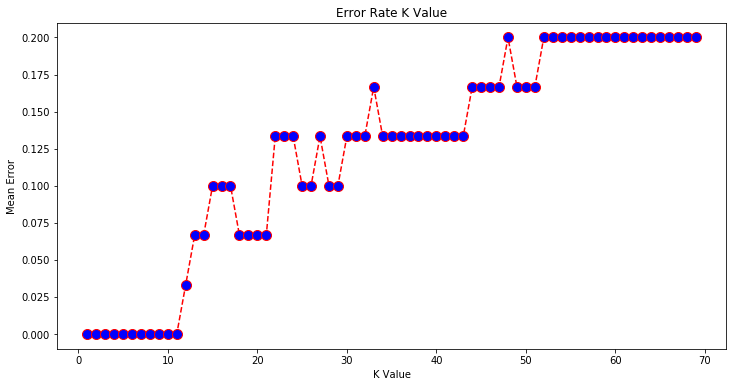

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1,70), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [110]:
#for the best range of K
print(error == min(error))
z= min(error)
print(z)


[ True  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]
0.0
